In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import math
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
/home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Reading dataset

In [194]:
table = pd.read_excel('gisaid_cov2020_acknowledgement_table.xls', encoding='utf-8', sep=',', index=False)
table

,Accession ID,Virus name,Location,Collection date,Originating lab,Submitting lab,Authors
0,EPI_ISL_417141,hCoV-19/USA/WA-S88/2020,North America / USA / Washington / King County,2020-03-01,Washington State Department of Health,Seattle Flu Study,Chu etl al
1,EPI_ISL_417142,hCoV-19/USA/WA-S89/2020,North America / USA / Washington / Umatilla Co...,2020-02-29,Washington State Department of Health,Seattle Flu Study,Chu etl al
2,EPI_ISL_417140,hCoV-19/USA/WA-S87/2020,North America / USA / Washington / King County,2020-03-01,Washington State Department of Health,Seattle Flu Study,Chu etl al
3,EPI_ISL_417145,hCoV-19/USA/WA-S92/2020,North America / USA / Washington / King County,2020-02-29,Washington State Department of Health,Seattle Flu Study,Chu etl al
4,EPI_ISL_417146,hCoV-19/USA/WA-S93/2020,North America / USA / Washington / King County,2020-02-29,Washington State Department of Health,Seattle Flu Study,Chu etl al
5,EPI_ISL_417143,hCoV-19/USA/WA-S90/2020,North America / USA / Washington / Umatilla Co...,2020-02-29,Washington State Department of Health,Seattle Flu Study,Chu etl al
6,EPI_ISL_417144,hCoV-19/USA/WA-S91/2020,North America / USA / Washington / Snohomish C...,2020-03-02,Washington State Department of Health,Seattle Flu Study,Chu etl al
7,EPI_ISL_417149,hCoV-19/USA/WA-S96/2020,North America / USA / Washington / King County,2020-02-28,Washington State Department of Health,Seattle Flu Study,Chu etl al
8,EPI_ISL_417147,hCoV-19/USA/WA-S94/2020,North America / USA / Washington / Snohomish C...,2020-02-28,Washington State Department of Health,Seattle Flu Study,Chu etl al
9,EPI_ISL_417148,hCoV-19/USA/WA-S95/2020,North America / USA / Washington / King County,2020-02-28,Washington State Department of Health,Seattle Flu Study,Chu etl al


### Cleaning dataset

Split column 'Location' and creating new columns 'Region', 'Country', 'State', City' and 'Other' and dropping unused.

In [195]:
data_ = table['Location'].str.split('/', expand=True)
data_ = table.join(data_).rename(columns={0:'Region', 1:'Country', 2:'State', 3:'City or Province', 4:'Other'})
data_.drop(['Location', 'Other'], axis=1, inplace=True)
data_

,Accession ID,Virus name,Collection date,Originating lab,Submitting lab,Authors,Region,Country,State,City or Province
0,EPI_ISL_417141,hCoV-19/USA/WA-S88/2020,2020-03-01,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,King County
1,EPI_ISL_417142,hCoV-19/USA/WA-S89/2020,2020-02-29,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,Umatilla County
2,EPI_ISL_417140,hCoV-19/USA/WA-S87/2020,2020-03-01,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,King County
3,EPI_ISL_417145,hCoV-19/USA/WA-S92/2020,2020-02-29,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,King County
4,EPI_ISL_417146,hCoV-19/USA/WA-S93/2020,2020-02-29,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,King County
5,EPI_ISL_417143,hCoV-19/USA/WA-S90/2020,2020-02-29,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,Umatilla County
6,EPI_ISL_417144,hCoV-19/USA/WA-S91/2020,2020-03-02,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,Snohomish County
7,EPI_ISL_417149,hCoV-19/USA/WA-S96/2020,2020-02-28,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,King County
8,EPI_ISL_417147,hCoV-19/USA/WA-S94/2020,2020-02-28,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,Snohomish County
9,EPI_ISL_417148,hCoV-19/USA/WA-S95/2020,2020-02-28,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,King County


In [196]:
data = data_['Virus name'].str.split('/', expand=True)
data = data_.join(data).rename(columns={0:'Virus', 1:'C', 2:'S', 3:'year', 4:'Other1'})
data.drop(['Virus name','C', 'S', 'year', 'Other1'], axis=1, inplace=True)
data

,Accession ID,Collection date,Originating lab,Submitting lab,Authors,Region,Country,State,City or Province,Virus
0,EPI_ISL_417141,2020-03-01,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,King County,hCoV-19
1,EPI_ISL_417142,2020-02-29,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,Umatilla County,hCoV-19
2,EPI_ISL_417140,2020-03-01,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,King County,hCoV-19
3,EPI_ISL_417145,2020-02-29,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,King County,hCoV-19
4,EPI_ISL_417146,2020-02-29,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,King County,hCoV-19
5,EPI_ISL_417143,2020-02-29,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,Umatilla County,hCoV-19
6,EPI_ISL_417144,2020-03-02,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,Snohomish County,hCoV-19
7,EPI_ISL_417149,2020-02-28,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,King County,hCoV-19
8,EPI_ISL_417147,2020-02-28,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,Snohomish County,hCoV-19
9,EPI_ISL_417148,2020-02-28,Washington State Department of Health,Seattle Flu Study,Chu etl al,North America,USA,Washington,King County,hCoV-19


Sorting dataframe by the collection date

In [197]:
data.sort_values('Collection date', ascending=True)

,Accession ID,Collection date,Originating lab,Submitting lab,Authors,Region,Country,State,City or Province,Virus
682,EPI_ISL_402131,2013-07-24,"Wuhan Institute of Virology, Chinese Academy o...","Wuhan Institute of Virology, Chinese Academy o...","Yan Zhu, Ping Yu, Bei Li, Ben Hu, Hao-Rui Si, ...",Asia,China,Yunnan,Pu'er,hCoV-19
63,EPI_ISL_410539,2017,Beijing Institute of Microbiology and Epidemio...,Beijing Institute of Microbiology and Epidemio...,Wu-Chun Cao; Tommy Tsan-Yuk Lam; Na Jia; Ya-We...,Asia,China,Guangxi,None,hCoV-19
69,EPI_ISL_410542,2017,Beijing Institute of Microbiology and Epidemio...,Beijing Institute of Microbiology and Epidemio...,Wu-Chun Cao; Tommy Tsan-Yuk Lam; Na Jia; Ya-We...,Asia,China,Guangxi,None,hCoV-19
70,EPI_ISL_410541,2017,Beijing Institute of Microbiology and Epidemio...,Beijing Institute of Microbiology and Epidemio...,Wu-Chun Cao; Tommy Tsan-Yuk Lam; Na Jia; Ya-We...,Asia,China,Guangxi,None,hCoV-19
71,EPI_ISL_410540,2017,Beijing Institute of Microbiology and Epidemio...,Beijing Institute of Microbiology and Epidemio...,Wu-Chun Cao; Tommy Tsan-Yuk Lam; Na Jia; Ya-We...,Asia,China,Guangxi,None,hCoV-19
68,EPI_ISL_410543,2017,Beijing Institute of Microbiology and Epidemio...,Beijing Institute of Microbiology and Epidemio...,Wu-Chun Cao; Tommy Tsan-Yuk Lam; Na Jia; Ya-We...,Asia,China,Guangxi,None,hCoV-19
64,EPI_ISL_410538,2017,Beijing Institute of Microbiology and Epidemio...,Beijing Institute of Microbiology and Epidemio...,Wu-Chun Cao; Tommy Tsan-Yuk Lam; Na Jia; Ya-We...,Asia,China,Guangxi,None,hCoV-19
51,EPI_ISL_410544,2019,Beijing Institute of Microbiology and Epidemio...,Beijing Institute of Microbiology and Epidemio...,Wu-Chun Cao; Tommy Tsan-Yuk Lam; Na Jia; Ya-We...,Asia,China,Guangdong,None,hCoV-19
2636,EPI_ISL_410721,2019,South China Agricultural University,South China Agricultural University,"Yongyi Shen, Lihua Xiao, Wu Chen",Asia,China,Guangdong,None,hCoV-19
2010,EPI_ISL_412860,2019-03-19,unknown,"SCSFRI, South China Sea Fisheries Research Ins...","Jiang,J.-Z., Liu,P. and Chen,J.-P.",Asia,China,None,None,hCoV-19


### Getting some initial insights from our dataset

In [198]:
data.describe()

,Accession ID,Collection date,Originating lab,Submitting lab,Authors,Region,Country,State,City or Province,Virus
count,3174,3174,3174,3174,3174,3174,3174,2845,526,3174
unique,3174,91,352,242,425,9,76,275,103,2
top,EPI_ISL_417398,2020-03-13,UW Virology Lab,UW Virology Lab,"Pavitra Roychoudhury, Hong Xie, Keith Jerome, ...",Europe,USA,Washington,King County,hCoV-19
freq,1,211,380,383,380,1499,702,393,75,3172


In [199]:
print ('The disease is reported by scientific community as',data['Virus'].describe()['top'],'also known as Severe acute respiratory syndrome-related coronavirus (COVID-19)')

The disease is reported by scientific community as hCoV-19 also known as Severe acute respiratory syndrome-related coronavirus (COVID-19)


In [200]:
print('Until now',data['Virus'].describe()['count'], 
      'samples, from',data['Country'].describe()['unique'], 'countries, ' 
      'distributed in',data['Region'].describe()['unique'], 'regions '
      'were sequenced by', data['Originating lab'].describe()['unique'], 'laboratories.')

Until now 3174 samples, from 76 countries, distributed in 9 regions were sequenced by 352 laboratories.


### Which was the Region that made more sequence analysis?

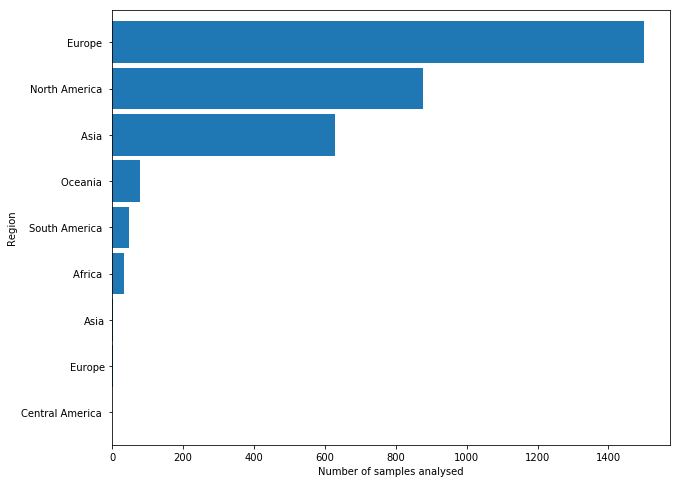

In [201]:
data['Region'].value_counts().plot('barh', width=0.9, figsize=(10,8)).invert_yaxis()
plt.xlabel('Number of samples analysed')
plt.ylabel('Region')
plt.show()

In [202]:
data['Region'].describe()

count        3174
unique          9
top       Europe 
freq         1499
Name: Region, dtype: object

In [203]:
print ('Between',data['Region'].describe()['unique'],
       'regions identified,',data['Region'].describe()['top'], 
       'was the one that performed the most tests, counting', 
       data['Country'].describe()['freq'],
       'sequencying analysis.')

Between 9 regions identified, Europe  was the one that performed the most tests, counting 702 sequencying analysis.


In [204]:
#Sampling by region
data.groupby('Region')['Country'].count()

Region
Africa                35
Asia                   4
Asia                 629
Central America        1
Europe                 3
Europe              1499
North America        876
Oceania               79
South America         48
Name: Country, dtype: int64

### Which was the Country that made more sequence analysis?

In [205]:
#Sampling by region and country
data.groupby('Region')['Country'].value_counts()

Region          Country         
Africa           Congo               19
                 Senegal             12
                 Algeria              2
                 Nigeria              1
                 South Africa         1
Asia             Malaysia             3
                China                 1
Asia             China              314
                 Japan               82
                 Hong Kong           70
                 China               29
                 Singapore           24
                 Iran                19
                 Taiwan              18
                 Georgia             10
                 South Korea          8
                 Vietnam              8
                 Malaysia             7
                 South Korea          5
                 Indonesia            4
                 Iran                 4
                 Kuwait               4
                 Philippines          4
                 Japan                3
       

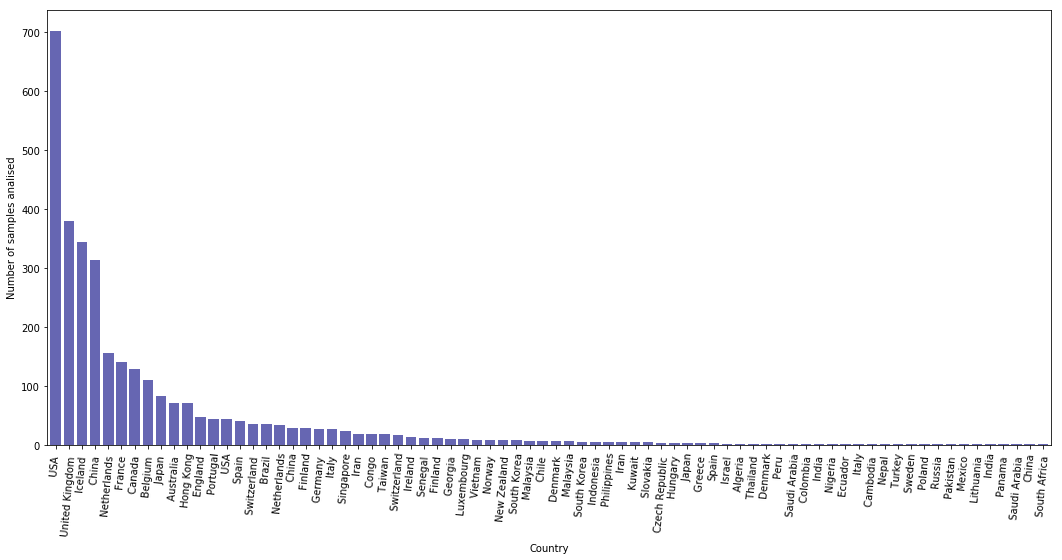

In [206]:
data['Country'].value_counts().plot('bar', colormap='jet', width=0.8, alpha=0.6, figsize=(18,8))
plt.xticks(rotation=85)
plt.xlabel('Country')
plt.ylabel('Number of samples analised')
plt.show()

In [207]:
data['Country'].describe()

count      3174
unique       76
top        USA 
freq        702
Name: Country, dtype: object

In [208]:
print ('Between',data['Country'].describe()['unique'],
       'countries,',data['Country'].describe()['top'], 
       'was the one that performed the most tests, counting', 
       data['Country'].describe()['freq'],
       'sequencying analysis.')

Between 76 countries,  USA  was the one that performed the most tests, counting 702 sequencying analysis.


### Taking inf about sampling

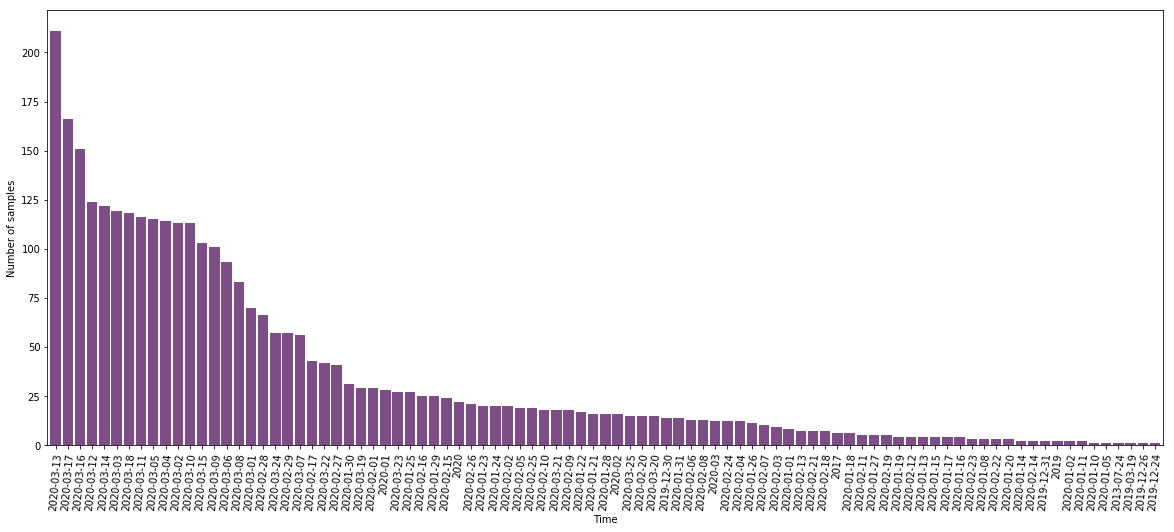

In [209]:
data['Collection date'].value_counts().plot('bar', colormap='viridis', width=0.85, alpha=0.7, figsize=(20,8))
plt.xticks(rotation=85)
plt.xlabel('Time')
plt.ylabel('Number of samples')
plt.show()

In [210]:
data['Collection date'].describe()

count           3174
unique            91
top       2020-03-13
freq             211
Name: Collection date, dtype: object

In [211]:
print('The oldest sample was collected in',data['Collection date'].min())

The oldest sample was collected in 2013-07-24


In [212]:
print('The most recent sample was collected in',data['Collection date'].max())

The most recent sample was collected in 2020-03-25


In [213]:
data['Originating lab'].describe()

count                3174
unique                352
top       UW Virology Lab
freq                  380
Name: Originating lab, dtype: object

In [214]:
print ('Between',data['Originating lab'].describe()['unique'], 
       'laboratories,', data['Originating lab'].describe()['top'], 
       'performed the higher number of analysis, counting', 
       data['Originating lab'].describe()['freq'], 'sequencies.')

Between 352 laboratories, UW Virology Lab performed the higher number of analysis, counting 380 sequencies.


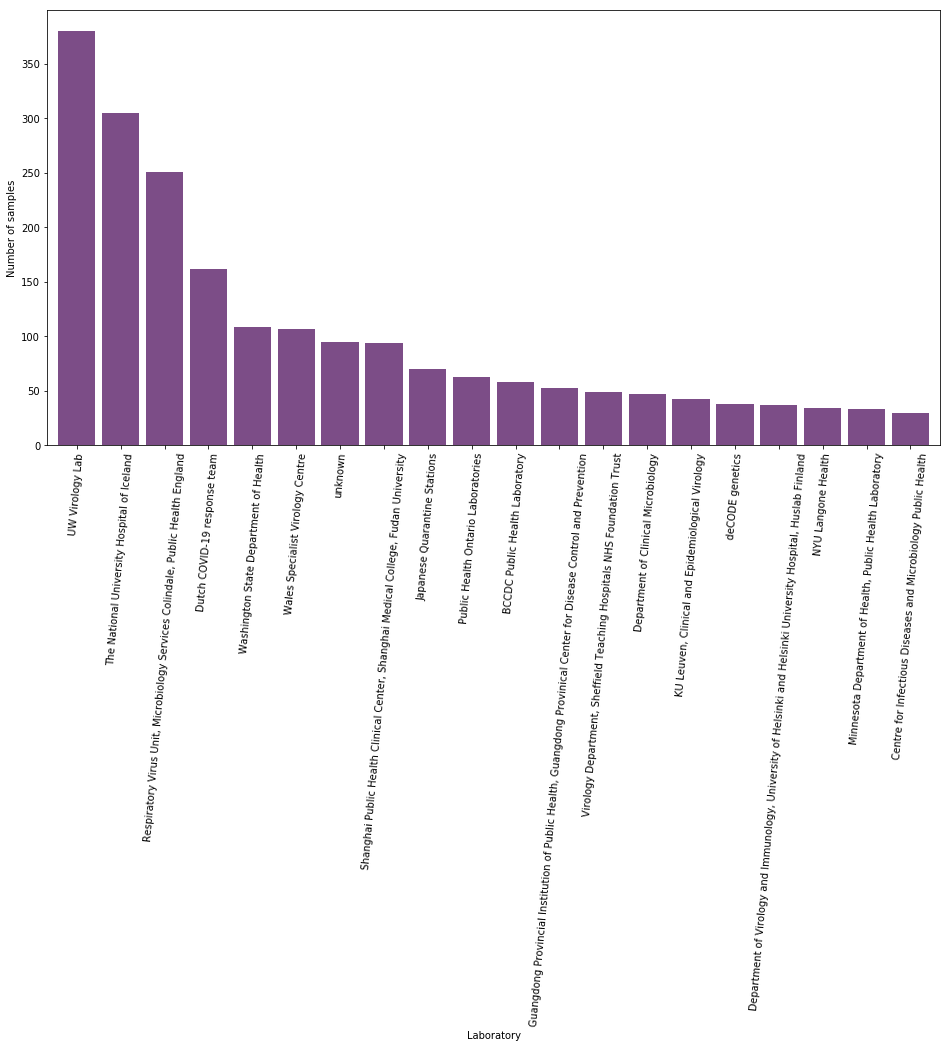

In [215]:
#Plotting the 20 laboratories that performed most number of analysis.
data['Originating lab'].value_counts().head(20).plot('bar', 
                                                     colormap='viridis', 
                                                     width=0.85, alpha=0.7, 
                                                     figsize=(16,8))
plt.xticks(rotation=85)
plt.xlabel('Laboratory')
plt.ylabel('Number of samples')
plt.show()

### Getting info about authors

In [216]:
data['Authors'].describe()

count                                                  3174
unique                                                  425
top       Pavitra Roychoudhury, Hong Xie, Keith Jerome, ...
freq                                                    380
Name: Authors, dtype: object

In [217]:
data['Authors'].value_counts().head()

Pavitra Roychoudhury, Hong Xie, Keith Jerome, Alexander Greninger                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             380
Daniel F Gudbjartsson; Agnar Helgason; Hakon Jonsson; Olafur T Magnusson; Pall Melsted; Gudmundur L Norddahl; Jona Saemundsdottir; Asgeir Sigurdsson; Patrick Sulem; Arna B Agustsdottir; Berglind Eiriksdottir; Run Fridriksdottir; E

In [218]:
print('The majority of publications are from', 
      data['Authors'].describe().top, 
      'counting   ', data['Authors'].describe().freq, 'publications' )

The majority of publications are from Pavitra Roychoudhury, Hong Xie, Keith Jerome, Alexander Greninger counting    380 publications


In [219]:
print('There are', data['Authors'].describe()['count'], 
      'publications, generated by', 
      data['Authors'].describe()['unique'], 
      'research groups')

There are 3174 publications, generated by 425 research groups


In [220]:
#Checking number of Authors by Region
data.groupby('Region')['Authors'].count()

Region
Africa                35
Asia                   4
Asia                 629
Central America        1
Europe                 3
Europe              1499
North America        876
Oceania               79
South America         48
Name: Authors, dtype: int64